In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./2019-XTern- Work Sample Assessment Data Science-DS.csv")

In [3]:
df

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4
...,...,...,...,...
25663,25663,0.943601,1.292008,0
25664,25664,0.971847,1.282083,0
25665,25665,0.956886,1.286652,4
25666,25666,0.959825,1.297630,1


In [9]:
df.power_level.value_counts()

0    4388
5    4343
4    4284
1    4248
2    4245
3    4160
Name: power_level, dtype: int64

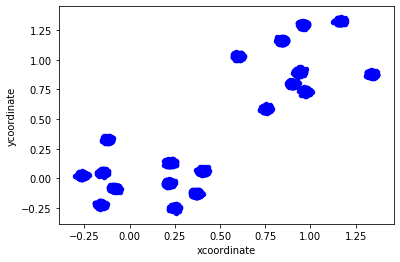

In [11]:
df.plot.scatter(x="xcoordinate", y="ycoordinate", c="Blue")

This shows that the locations of the scooters are in clear clusters, specifically 19 different areas

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.00061531e-01, -2.66669950e-01, -2.33278370e-01, -1.99886789e-01,
        -1.66495209e-01, -1.33103628e-01, -9.97120478e-02, -6.63204672e-02,
        -3.29288867e-02,  4.62693860e-04,  3.38542744e-02,  6.72458549e-02,
         1.00637435e-01,  1.34029016e-01,  1.67420597e-01,  2.00812177e-01,
         2.34203758e-01,  2.67595338e-01,  3.00986919e-01,  3.34378499e-01,
         3.67770080e-01,  4.01161660e-01,  4.34553241e-01,  4.67944821e-01,
         5.01336402e-01,  5.34727982e-01,  5.68119563e-01,  6.01511144e-01,
         6.34902724e-01,  6.68294305e-01,  7.01685885e-01,  7.35077466e-01,
         7.68469046e-01,  8.01860627e-01,  8.35252207e-01,  8.68643788e-01,
         9.02035368e-01,  9.35426949e-01,  9.68818530e-01,  1.00221

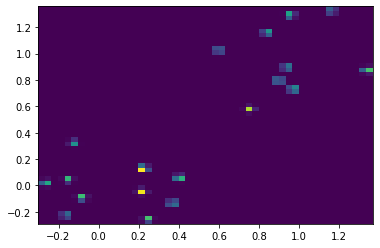

In [23]:
import matplotlib.pyplot as plt
plt.hist2d(x=df.xcoordinate, y=df.ycoordinate, bins=50)

This 2D histogram works as a heatmap to show the most popular areas. **The areas with the lighter yellow-ish colors are more dense and so represent the most popular scooter locations.** Based on this heatmap, **the single most popular location seems to be the area at around (0.2, 0.2).**

In [27]:
df.loc[((df["xcoordinate"] > 0.125) & (df["xcoordinate"] < 0.3)) & ((df["ycoordinate"] > 0.1) & (df["ycoordinate"] < 0.25))].count()

scooter_id     2205
xcoordinate    2205
ycoordinate    2205
power_level    2205
dtype: int64

In [28]:
df.loc[((df["xcoordinate"] > -0.25) & (df["xcoordinate"] < 0)) & ((df["ycoordinate"] > 0.25) & (df["ycoordinate"] < 0.5))].count()

scooter_id     971
xcoordinate    971
ycoordinate    971
power_level    971
dtype: int64

The above commands were done to gauge the approximate amount of scooters at each of the clusters.

In [31]:
justScooterTime = 0
for pw in df.power_level:
    curr = (5 - pw)
    justScooterTime += curr

print("Total time to charge all scooters (without transportation) = " + str(justScooterTime))

Total time to charge all scooters (without transportation) = 64271


The above command goes through each scooter, find its power level, and uses the power level to determine how many hours it would take to charge the scooter. All the charging times are summed up into justScooterTime. This assumes that the scooters charge linearly.

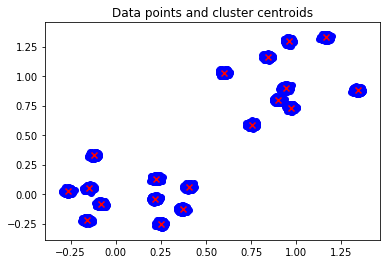

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=19).fit(df.loc[:, 'xcoordinate':'ycoordinate'])
plt.scatter(x=df.xcoordinate, y=df.ycoordinate, c="Blue")
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

This uses k-means clustering to find the different clusters and plot their centers. This will be used to find the distance for travel for the charging truck.

In [53]:
import math
import numpy as np
centers = kmeans.cluster_centers_
distance = 0
small = math.sqrt(((20.19 - (centers[0])[0])*(20.19 - (centers[0])[0]) + (20.19 - (centers[0])[1])*(20.19 - (centers[0])[1])))
smallInd = 0
smallArr = centers[0]
for i in range(len(centers)):
    curr = math.sqrt(((20.19 - (centers[i])[0])*(20.19 - (centers[i])[0]) + (20.19 - (centers[i])[1])*(20.19 - (centers[i])[1])))
    if curr < small:
        small = curr
        smallInd = i
        smallArr = centers[i]
distance += small
while len(centers) != 0:
    distance += (2 * small)
    centers = list(centers[:smallInd]) + list(centers[(smallInd+1):])
    centers = np.array(centers)
    if len(centers) == 0:
        break
    x = smallArr[0]
    y = smallArr[1]
    for i in range(len(centers)):
        curr = math.sqrt(((x - (centers[i])[0])*(x - (centers[i])[0]) + (y - (centers[i])[1])*(y - (centers[i])[1])))
        if curr < small:
            small = curr
            smallInd = i
            smallArr = centers[i]
    distance += small
    small = math.sqrt(((20.19 - smallArr[0])*(20.19 - smallArr[0]) + (20.19 - smallArr[1])*(20.19 - smallArr[1])))
distance += small
print("Total distance traveled by truck for charging all areas = " + str(distance))

Total distance traveled by truck for charging all areas = 1119.5792037350186


The above code calculates the total distance traveled for the truck between the 19 different areas. This assumes that the truck can fit all the scooters at each of the 19 areas. This strategy finds the area that is the shortest distance away from the parking coordinates (20.19, 20.19). It then goes to the area and picks up all the scooters, then goes back to the parking coordinates where the truck is parked to charge the scooters. It then goes back to the area to place the scooters back, and from their finds the next closest area to repeat the cycle until all 19 areas' scooters are charged.

Each area has many scooters, each having at least one scooter that is at power level 0. That means each time the truck is parked to charge the scooters, it must wait 5 hours to make sure all scooters are charged to power level 5. It charges scooters from 19 different areas so:

Total time parked charging scooters = 19 * 5 = 95 hrs

On top of this, there is the travel time for the truck to move around. Assuming the truck always moves at 50 mph, and the coordinates correspond to mile values and distances, then:

Total time spent traveling in truck = 1119.5792037350186 / 50 = 22.3915840747 hrs

This means the Operation Time Cost for this strategy of charging all the scooters is:

**Operation Time Cost = 95 + 22.3915840747 = 117.391584075 hours**